# Plot for Lucy 6/9/18

Challenge:

Make figures 7-12 of paper https://www.overleaf.com/15154648wznpkvkvxtzn

Provided galaxies:

file name | rotation | pixel size
-|-|-
agc4109natural_kmh20kms.edit4_mom0.fits | 82.83 | 1.7
9244_CLN_V2_0.edit3_mom0.fits | 39.01 | 2
agc6871all_natural_kmh20kms.edit3_mom0.fits | 33.74 | 1.4
9362_CLN_V2_4.edit1_mom0.fits | 64.5 | 2
8408_CLN_V2_0.edit1_mom0.fits | -37.45 | 2
B10_ALL_NAT.APCLN.edit6_mom0.fits | 40.42 | 1.7

Credit to Lucy Newnham for the original code, which I have modified.


Setting up our environment:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd
from astropy.io import fits
from scipy.ndimage import interpolation as ipt

In [2]:
df = pd.DataFrame.from_dict({
    'file name': [
        'agc4109natural_kmh20kms.edit4_mom0.fits',
        '9244_CLN_V2_0.edit3_mom0.fits',
        'agc6871all_natural_kmh20kms.edit3_mom0.fits',
        '9362_CLN_V2_4.edit1_mom0.fits',
        '8408_CLN_V2_0.edit1_mom0.fits',
        'B10_ALL_NAT.APCLN.edit6_mom0.fits',
    ],
    'rotation': [82.83, 39.01, 33.74, 64.5, -37.45, 40.42],
    'pixel size': [1.7, 2, 1.4, 2, 2, 1.7],
})
df

,file name,pixel size,rotation
0,agc4109natural_kmh20kms.edit4_mom0.fits,1.7,82.83
1,9244_CLN_V2_0.edit3_mom0.fits,2.0,39.01
2,agc6871all_natural_kmh20kms.edit3_mom0.fits,1.4,33.74
3,9362_CLN_V2_4.edit1_mom0.fits,2.0,64.50
4,8408_CLN_V2_0.edit1_mom0.fits,2.0,-37.45
5,B10_ALL_NAT.APCLN.edit6_mom0.fits,1.7,40.42


Test run for the first galaxy for styling choices

In [3]:
galaxy = df.iloc[0]

# Open the FITS file
hIFits = fits.open(galaxy['file name'])

# Make use of scipy to rotate the array about its center
hIRotated = ipt.rotate(hIFits[0].data, galaxy['rotation'])

# Find the center point of the new array (pixel coordinates)
center = np.array(hIRotated.shape) / 2

# Calculate our array of summed values of the center cutout
middle = np.add.reduce(hIRotated[:, int(center[1]-1):int(center[1]+1)], axis=1)

And now onto the plotting part of the code!

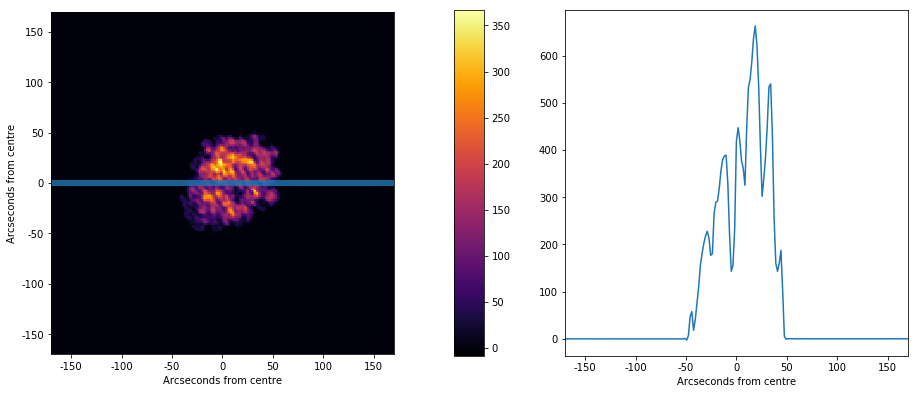

In [5]:
# Choose the cropping we want
lowerCrop = (center - 100).astype(int)
upperCrop = (center + 100).astype(int)

# create a new figure
fig = plt.figure(figsize=(14, 6))

# working on the first panel
plt.subplot(121)
ax = plt.gca()

# show the rotated HI data
im = plt.imshow(hIRotated, origin='lower', cmap='inferno')

# Add a rectangle to represent center region
r = Rectangle([0, center[1]-1.5], hIRotated.shape[1], 3, alpha=0.8)
ax.add_artist(r)

# Choose the x-ticks we want to display (every 50 arcseconds)
xticks = np.arange(-500, 500, 50)
# figure out where they should be positioned and place them
ax.set_xticks(xticks / galaxy['pixel size'] + center[0])
# set the labels
ax.set_xticklabels(xticks)

# same as above for y-axis
yticks = np.arange(-500, 500, 50)
ax.set_yticks(yticks / galaxy['pixel size'] + center[1])
ax.set_yticklabels(yticks)

# axis labels
ax.set_xlabel('Arcseconds from centre')
ax.set_ylabel('Arcseconds from centre')

# setting limits to crop our image
ax.set_xlim(lowerCrop[0], upperCrop[0])
ax.set_ylim(lowerCrop[1], upperCrop[1])

# adjust the positioning so we can fit the colorbar in
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.95, top=0.9, wspace=0.5)

# add the colorbar axes
cbaxes = fig.add_axes([0.5, 0.1, 0.03, 0.8]) 
# add the colorbar
fig.colorbar(im, cbaxes)

# Now for the second panel
plt.subplot(122)
ax = plt.gca()

# Plot the array we've calculated
ax.plot(middle)

# Set the xticks
ax.set_xticks(xticks / galaxy['pixel size'] + center[0])
ax.set_xticklabels(xticks)

# Set the limit
ax.set_xlim(lowerCrop[0], upperCrop[0])

# And axis label!
ax.set_xlabel('Arcseconds from centre')

# Save the output
plt.savefig('example.png', bbox_inches='tight')